In [1]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import celluloid
from mpl_toolkits.mplot3d import Axes3D

# logistic regression

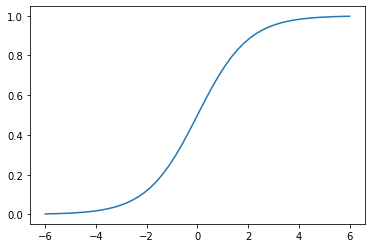

In [2]:
def sigmoid(z):
    z = float(np.squeeze(z))
    return 1 / (1 + np.e**(-z))
x = np.linspace(-6,6)
y = [sigmoid(xx) for xx in x]
plt.plot(x,y)

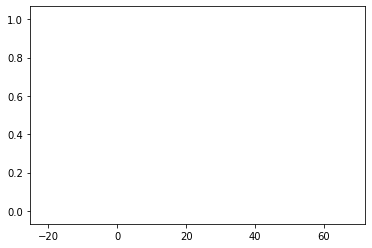

In [3]:
# build a dataset
n = 15
x = np.append(15 * np.random.randn(n) + 45,
              15 * np.random.randn(n))
y = np.append(np.zeros(shape=n),
    np.ones(shape=n))

# initialize parameters
learning_rate = 0.01
w = np.squeeze(np.random.uniform(0, 0.01, size=1))
b = 0

# optimize and visualize
fig = plt.figure()
camera = celluloid.Camera(fig)
for i in range(100):
    y_pred = np.array([sigmoid(w*x_i + b) for x_i in x])
    # loss = np.mean(-y*np.log(y_pred) - (1-y)*np.log(1-y_pred))
    dloss = y_pred - y
    w -= learning_rate * (x * dloss).mean()
    b -= learning_rate * dloss.mean()
    sigmoid_curve = [sigmoid(w*x_ + b) for x_ in np.linspace(x.min(),x.max())]
    s = plt.plot(np.linspace(-20,20), sigmoid_curve, color="lightblue")
    plt.legend(s, [f"w={w:.2f}, b={b:.2f}"])
    plt.scatter(x[y_pred >= 0.5], y[y_pred >= 0.5], color="royalblue")
    plt.scatter(x[y_pred < 0.5], y[y_pred < 0.5], color="blue")
    camera.snap()
    
animation = camera.animate(interval=50)
HTML(animation.to_html5_video())

In [4]:
# 2-features example

In [5]:
# learning_rate = 0.5
# n = 15
# x = np.concatenate((3*np.random.randn(n,2)+4,
#                     5*np.random.randn(n,2)-3)).T
# y = np.concatenate((np.zeros(shape=(n,1)),
#                     np.ones(shape=(n,1)))).T
# w = np.random.uniform(0, 0.01, size=(2,1))
# b = 0
# fig = plt.figure()
# camera = celluloid.Camera(fig)

# axes = []
# for placement, perspective in enumerate([(10, 90),
#                                          (10, 180),
#                                          (75, 75)], start=1):
#     ax = fig.add_subplot(2, 2, placement, projection="3d")
#     ax.view_init(*perspective)
#     axes.append(ax)
    
# X, Y = np.meshgrid(np.linspace(x[0,:].min(),x[0,:].max(), 9),
#                    np.linspace(x[1,:].min(),x[1,:].max(), 9))

# for _ in range(10):
#     y_pred = np.array([sigmoid(_) for _ in np.squeeze(w.T@x + b)])
#     dloss = y_pred - y
#     w -= learning_rate * (x * dloss).mean()
#     b -= learning_rate * dloss.mean()
#     Z = np.zeros(shape=X.shape)
#     for i, xx in enumerate(X[0,:]):
#         for j, yy in enumerate(Y[:,0]):
#             Z[i,j] = sigmoid(w.T@np.matrix([[xx],[yy]]) + b)
#     classification = \
#         (np.array([sigmoid(_) for _ in np.squeeze(w.T@x + b)]) < 0.5) == y
#     for ax in axes:
#         ax.scatter(x[0,:], x[1,:], y[0,:], c=classification[0])
#         ax.plot_wireframe(X, Y, Z)
#     camera.snap()

In [6]:
# animation = camera.animate(interval=100)
# HTML(animation.to_html5_video())

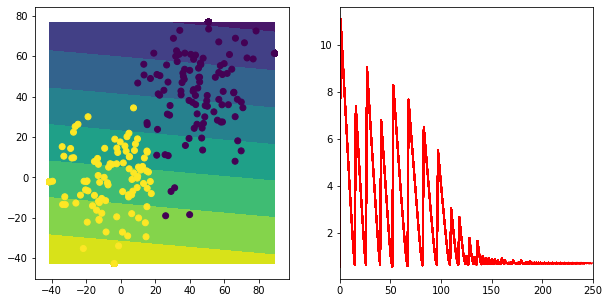

In [67]:
n_iterations = 250

np.random.seed(69)
n_examples = 100
x = np.append(15 * np.random.standard_normal((n_examples,2)) + 45,
              15 * np.random.standard_normal((n_examples,2)), axis=0).T
y = np.append(np.zeros(shape=n_examples), np.ones(shape=n_examples))
w = np.squeeze(np.random.uniform(0, 0.01, size=(1,2)))
b = 0
learning_rate = 0.01

#range, domain
rez = 25
X, Y = np.meshgrid(np.linspace(x[0,:].min(),x[0,:].max(), rez),
                   np.linspace(x[1,:].min(),x[1,:].max(), rez))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax2.set_xlim((0,n_iterations))
camera = celluloid.Camera(fig)

losses = []
for i in range(n_iterations):
    if i % 10 == 0:
        learning_rate *= 0.95
    y_pred = np.array([sigmoid(_) for _ in np.squeeze(w.T@x + b)])
    loss = -np.mean(y*np.log(y_pred) + (1-y)*np.log(y_pred))
    losses.append((i,loss))
    activations = (y_pred > 0.5)
    dloss = activations - y
    w -= learning_rate * (x * dloss).mean()
    b -= learning_rate * dloss.mean()
    
    Z = np.zeros(shape=X.shape)
    for i, xx in enumerate(X[0,:]):
        for j, yy in enumerate(Y[:,0]):
            Z[i,j] = sigmoid(w.T@np.matrix([[xx],[yy]]) + b)
    ax1.contourf(X, Y, Z)
    ax1.scatter(x=x[0,:],y=x[1,:], c=activations.astype(int))
    
    ax2.plot(*zip(*losses), color="red")
    
    camera.snap()

In [68]:
animation = camera.animate(interval=50)
HTML(animation.to_html5_video())

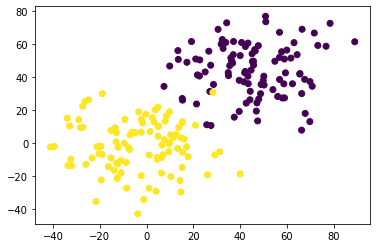

In [66]:
plt.scatter(x=x[0,:],y=x[1,:], c=y)